In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve, auc, roc_auc_score

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("../datasets/diabetes.csv", header=0, names=col_names)

X = pima[['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']]
Y = pima[['label']]

# SPLIT the data (70:30)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state=0)

model= DecisionTreeClassifier() 

# Train Decision Tree Classifer
model = model.fit(train_x, train_y)

#Predict the response for test dataset
pred_y = model.predict(test_x)

print("Accuracy:", metrics.accuracy_score(test_y, pred_y))

print("AUC:", roc_auc_score(test_y, pred_y))


Accuracy: 0.7359307359307359
AUC: 0.6985711826476159


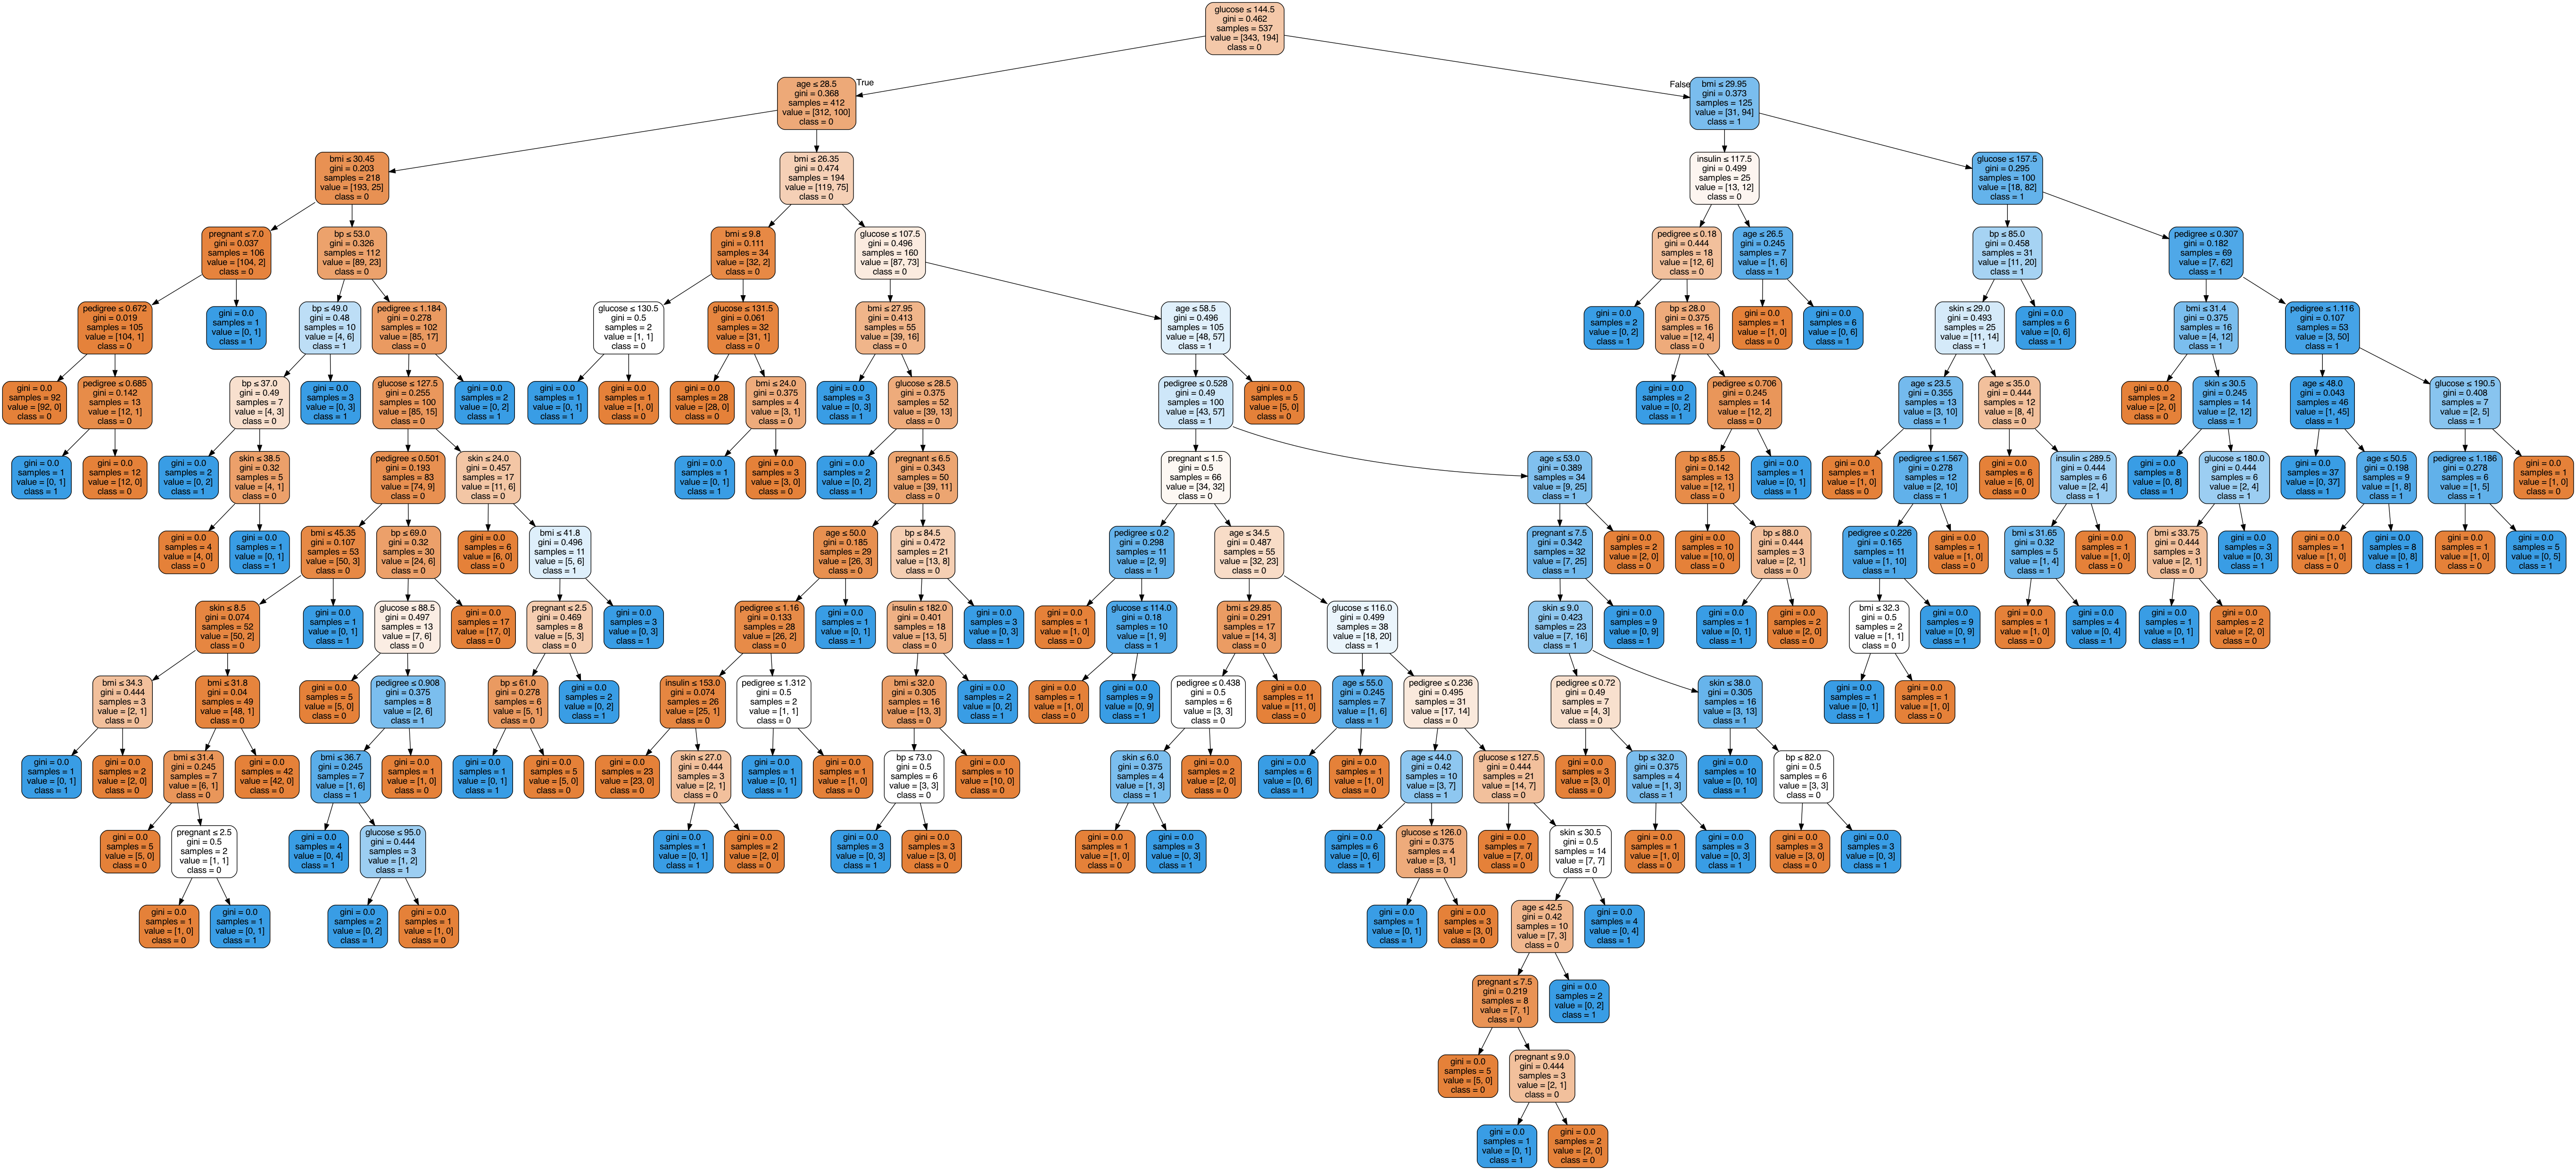

In [2]:
# Vizualization of the decision tree

from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../datasets/diabetes.csv')
Image(graph.create_png())